<a href="https://colab.research.google.com/github/Cvanshulll/Improving_Video_call_experience_with_ML/blob/main/Emotion_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import keras
from keras.optimizers import Adam

In [136]:
x = pd.read_csv('/content/drive/MyDrive/Dataset/emotion_dataset/fer2013.csv')
print (x.values.shape)

(35887, 3)


In [138]:
x.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [139]:

y = x.values[:,0]
pixels = x.values[:, 1]
print (type(pixels))
print (len(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
35887
8287
3


In [140]:
p = pixels[10].split(' ')
print(len(p))

2304


In [141]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [142]:
temp = X

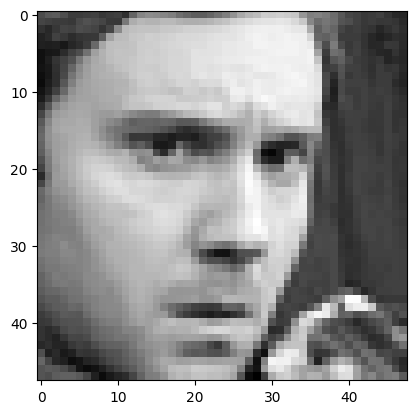

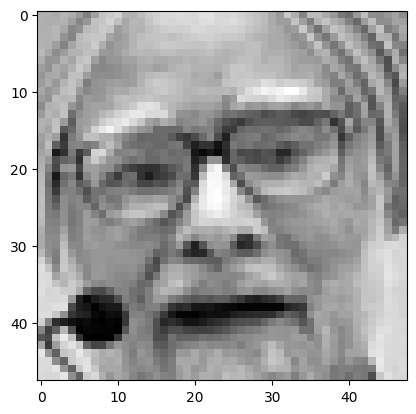

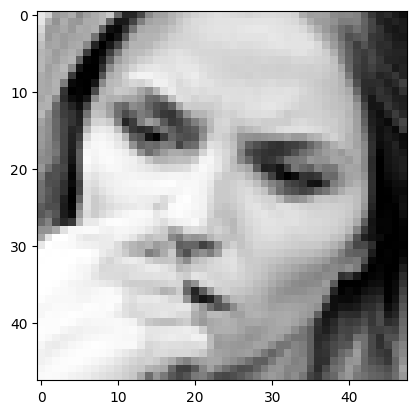

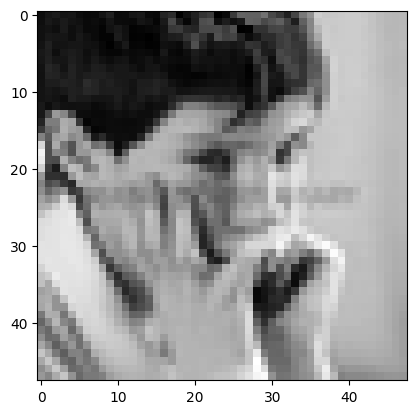

In [143]:


for ix in range(4):
    plt.figure(ix)
    plt.imshow(temp[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()



In [144]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [145]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [146]:
X=X/255

In [147]:
X

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [148]:
X_train = X[0:30000, :]
Y_train = y[0:30000]
print (X_train.shape, Y_train.shape)

X_test = X[30000:32300,:]
Y_test = y[30000:32300]
print (X_test.shape, Y_test.shape)

(30000, 2304) (30000,)
(2300, 2304) (2300,)


In [149]:
X_train = X_train.reshape((X_train.shape[0], 48, 48,1 ))
X_test  = X_test.reshape((X_test.shape[0], 48, 48,1))

In [150]:

Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test  = tf.keras.utils.to_categorical(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(30000, 7)
(2300, 7)


In [152]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [155]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [160]:
from keras.optimizers import Adam
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.22))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam' ,
              metrics=['acc'])

In [163]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7) ,
              metrics=['acc'])

In [164]:


batch_size = 64
epochs = 40

In [165]:
history = model.fit(X_train, Y_train, 
                    batch_size=batch_size,
                    validation_data=(X_test, Y_test),
                    epochs = epochs,
                    shuffle=True, 
                    verbose = 2)

Epoch 1/40
469/469 - 10s - loss: 1.8222 - acc: 0.2467 - val_loss: 1.7711 - val_acc: 0.2726 - 10s/epoch - 20ms/step
Epoch 2/40
469/469 - 8s - loss: 1.6790 - acc: 0.3246 - val_loss: 1.4836 - val_acc: 0.4183 - 8s/epoch - 18ms/step
Epoch 3/40
469/469 - 8s - loss: 1.4960 - acc: 0.4164 - val_loss: 1.3360 - val_acc: 0.4809 - 8s/epoch - 18ms/step
Epoch 4/40
469/469 - 8s - loss: 1.3841 - acc: 0.4700 - val_loss: 1.2639 - val_acc: 0.5126 - 8s/epoch - 18ms/step
Epoch 5/40
469/469 - 8s - loss: 1.3188 - acc: 0.4942 - val_loss: 1.2254 - val_acc: 0.5235 - 8s/epoch - 18ms/step
Epoch 6/40
469/469 - 10s - loss: 1.2773 - acc: 0.5099 - val_loss: 1.2009 - val_acc: 0.5409 - 10s/epoch - 21ms/step
Epoch 7/40
469/469 - 8s - loss: 1.2392 - acc: 0.5264 - val_loss: 1.2083 - val_acc: 0.5413 - 8s/epoch - 18ms/step
Epoch 8/40
469/469 - 8s - loss: 1.2074 - acc: 0.5407 - val_loss: 1.1844 - val_acc: 0.5430 - 8s/epoch - 18ms/step
Epoch 9/40
469/469 - 8s - loss: 1.1836 - acc: 0.5532 - val_loss: 1.1233 - val_acc: 0.5652 - 

In [167]:
model.evaluate(X_test, Y_test)

72/72 [==============================] - 1s 14ms/step - loss: 1.0782 - acc: 0.6100


[1.0781866312026978, 0.6100000143051147]

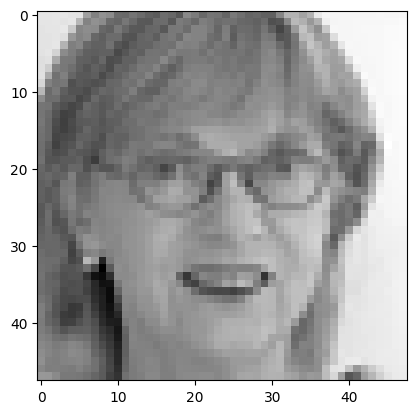

In [186]:

# Assuming X_test[0] is a grayscale image of shape (48, 48, 1)
image = X_test[3].squeeze()  # Remove the last dimension to convert from (48, 48, 1) to (48, 48)

plt.imshow(image, cmap='gray')
plt.show()


In [187]:
y_predicted= model.predict(X_test)
y_predicted[3]

72/72 [==============================] - 0s 4ms/step


array([3.7257686e-02, 5.0095139e-05, 4.8233396e-03, 7.5418907e-01,
       1.4923725e-02, 6.0909695e-04, 1.8814707e-01], dtype=float32)

In [188]:
np.argmax(y_predicted[3])  ## correct 3 -> happy

3

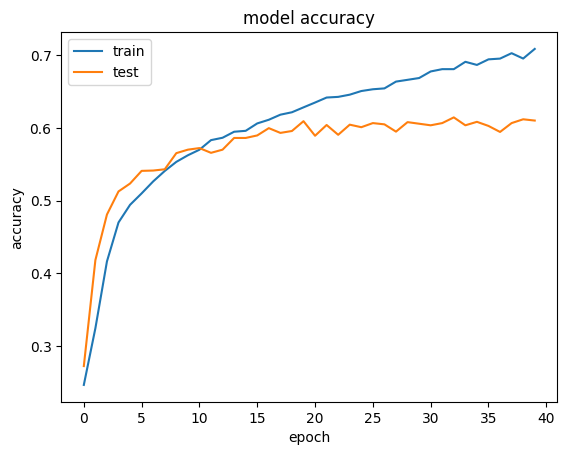

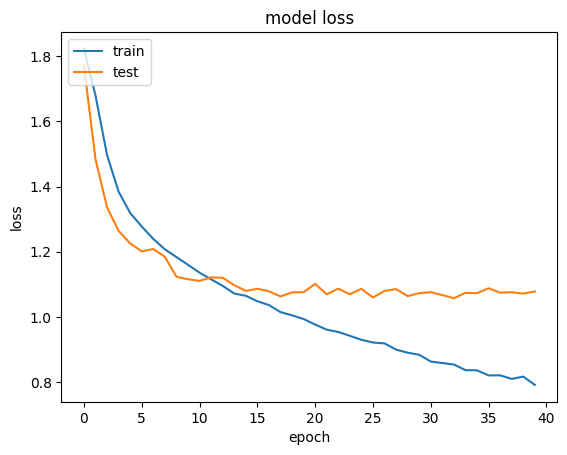

In [189]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [190]:
model.save('emotion_detection_model.h5')